<a href="https://colab.research.google.com/github/alcrepaldi/tera_inferencia/blob/main/inferencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DEPRESSÃO E HÁBITOS SAUDÁVEIS**


O transtorno depressivo representa um grande problema de saúde pública e é apontado como uma das principais causas de doenças e debilitações segundo a Organização Mundial da Saúde (OMS). A depressão resulta de uma interação complexa de fatores sociais, psicológicos e biológicos e, embora o acesso a diagnósticos e tratamentos esteja aumentando, muitos ainda não possuem acesso ao controle adequado dos sintomas depressivos.

Neste desafio, utilizaremos dados de uma pesquisa realizada anualmente nos Estados Unidos para avaliar:

(1) Qual o perfil de indivíduos (adultos maiores de 18 anos) com sintomas depressivos nos EUA no período de 2005-2006.

(2) Se hábitos saudáveis de alimentação e atividade física estão associados a menores índices de depressão nesta população.

# **IMPORTANDO BIBLIOTECAS**

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sbn

# **IMPORTANDO CSV's**

In [56]:
df_demo = pd.read_csv('DEMO_PHQ.csv', sep=',', encoding='UTF-8')
df_hei = pd.read_csv('PAG_HEI.csv', sep=',', encoding='UTF-8')

# **COMBINANDO OS DATAFRAMES**

In [57]:
df_merger = pd.merge(df_demo, df_hei, on='SEQN')

# **REMOVENDO A COLUNA SEQN**

In [58]:
df_merger.drop(columns='SEQN', axis=1, inplace = True)

# **ELIMINANDO OS VALORES NULOS**

In [59]:
df_merger.fillna(0, inplace = True, axis=0)

# **CRIANDO INDICES DPQ**

In [60]:
DPQ_col = []
for i in range(10, 91, 10):
    DPQ_col.append("DPQ0{}".format(i))

# **CONTANDO RESPOSTAS 7 E 9**

In [61]:
resp_7_9 = {}
for col in DPQ_col:
    sete = len(df_merger[df_merger[col]== 7])
    nove = len(df_merger[df_merger[col]== 9])
    resp_7_9[col] = [sete, nove]


# **SUBSTITUINDO 7 E 9 POR 0**

In [62]:
for coluna in DPQ_col:
    df_merger[coluna] = df_merger[coluna].replace([7,9], 0)

# **SOMANDO COLUNAS DPQ E CRIANDO VARIÁVEL PHQ9**

In [63]:
df_merger['phq9'] = df_merger['DPQ010'] + df_merger['DPQ020'] + df_merger['DPQ030'] + df_merger['DPQ040'] + df_merger['DPQ050'] + df_merger['DPQ060'] + df_merger['DPQ070'] + df_merger['DPQ080'] + df_merger['DPQ090']

# **VARIÁVEL PHQ_GRP**

In [64]:
def grp_sint(df_merger):

    if df_merger['phq9'] < 5:
        return '0'
    elif 5 <= df_merger['phq9'] < 10:
        return '1'
    elif 10 <= df_merger['phq9'] < 15:
        return '2'
    elif 15 <= df_merger['phq9'] < 19:
        return '3'
    else:
        return '4'


In [65]:
df_merger['PHQ_GRP'] = df_merger.apply(grp_sint, axis = 1)

# **CLASSIFICAÇÃO SINTOMAS**

0.   SEM SINTOMAS
1.   SINTOMAS LEVES
2.   SINTOMAS MODERADOS
3.   SINTOMAS MODERADAMENTE SEVEROS
4.   SINTOMAS SEVEROS 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


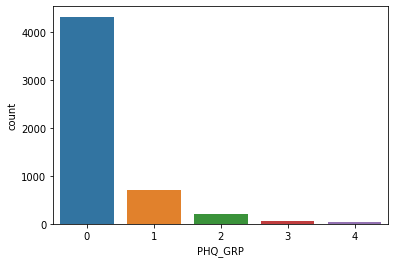

In [66]:
sbn.countplot(df_merger['PHQ_GRP'])
plt.show()

# **FILTRANDO INDIVIDUOS COM SINTOMAS**

Temos 3185 individuos com sintomas de depressão

In [92]:
perfil_com_sintomas = (df_merger[df_merger['phq9']!= 0])


In [97]:
perfil_com_sintomas 


,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9,PHQ_GRP
4,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,2,18,2,3,11.0,1729.145497,3.0,5.000000,0.000000,0.991614,0.056664,0.211544,0.000000,4.088849,4.221442,10.000000,2.845774,0.000000,10.000000,9.658507,47.074393,4.0,0
5,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1,19,3,4,11.0,3768.083141,3.0,2.867000,0.389880,5.000000,5.000000,1.444002,5.000000,3.372033,0.000000,0.002362,5.223435,7.787420,0.000000,10.000000,46.086131,6.0,1
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,79,3,3,3.0,1254.041570,3.0,2.499002,0.000000,5.000000,5.000000,5.000000,5.000000,4.093324,0.000000,7.660037,9.368343,9.253592,10.000000,8.797673,71.671972,1.0,0
9,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,2,59,4,3,7.0,138.568129,1.0,0.849132,0.000000,0.023828,0.000000,2.287457,5.000000,5.000000,5.000000,2.805860,9.298090,10.000000,6.738039,0.000000,47.002405,3.0,0
10,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,2,27,1,3,7.0,990.762125,3.0,5.000000,1.347104,0.014032,0.000000,0.972908,5.000000,5.000000,4.546475,3.042452,1.362072,6.405209,1.726454,9.879221,44.295927,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5328,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,18,4,2,3.0,207.852194,2.0,2.478410,0.000000,0.851953,0.087830,0.000000,1.772820,5.000000,5.000000,10.000000,7.385547,9.397864,10.000000,0.000000,51.974424,1.0,0
5329,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2,58,5,2,3.0,9.237875,1.0,2.885575,1.260753,5.000000,5.000000,4.607930,2.555736,5.000000,4.672204,4.633477,0.000000,6.580006,8.393244,9.360990,59.949915,2.0,0
5330,0.0,2.0,0.0,1.0,1.0,2.0,1.0,3.0,0.0,2,66,1,1,8.0,173.210162,2.0,5.000000,2.851503,5.000000,5.000000,3.041603,5.000000,3.759596,2.344264,4.780282,3.134216,1.986137,5.850269,10.000000,57.747869,10.0,2
5331,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1,19,4,4,2.0,184.711316,2.0,2.555935,0.000000,2.613733,0.000000,0.000000,2.151846,5.000000,0.000000,9.344947,3.535211,4.326307,5.269780,8.195564,42.993323,2.0,0


# **FILTRANDO INDIVIDUOS SEM SINTOMAS**

Temos 2149 individuos sem sintomas de depressão


In [99]:
perfil_sem_sintomas = (df_merger[df_merger['phq9']== 0])

In [100]:
perfil_sem_sintomas

,DPQ010,DPQ020,DPQ030,DPQ040,DPQ050,DPQ060,DPQ070,DPQ080,DPQ090,RIAGENDR,RIDAGEYR,RIDRETH1,DMDEDUC,INDFMINC,PAG_MINW,ADHERENCE,HEI2015C1_TOTALVEG,HEI2015C2_GREEN_AND_BEAN,HEI2015C3_TOTALFRUIT,HEI2015C4_WHOLEFRUIT,HEI2015C5_WHOLEGRAIN,HEI2015C6_TOTALDAIRY,HEI2015C7_TOTPROT,HEI2015C8_SEAPLANT_PROT,HEI2015C9_FATTYACID,HEI2015C10_SODIUM,HEI2015C11_REFINEDGRAIN,HEI2015C12_SFAT,HEI2015C13_ADDSUG,HEI2015_TOTAL_SCORE,phq9,PHQ_GRP
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,85,3,4,4.0,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,44,4,4,11.0,264.711316,2.0,3.115103,0.000000,5.000000,1.320674,0.000000,3.141062,4.071959,2.052399,0.684985,2.297100,9.512964,0.438428,3.919226,35.553899,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,70,3,5,11.0,1353.348730,3.0,3.509081,0.000000,5.000000,5.000000,5.000000,4.448512,5.000000,0.000000,2.050769,7.369489,8.887880,8.186877,9.099088,63.551696,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,73,3,3,12.0,1011.478060,3.0,2.845772,1.283933,2.629005,5.000000,2.217331,2.313900,5.000000,1.268648,2.958985,0.000000,5.627488,5.863078,5.878686,42.886826,0.0,0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,21,2,3,3.0,1720.554273,3.0,2.025145,0.000000,2.205125,0.000000,0.000000,5.000000,1.153747,0.000000,6.209888,6.747360,0.000000,7.473184,6.573559,37.388008,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5311,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,25,1,4,7.0,3005.958430,3.0,2.617155,0.000000,5.000000,4.888647,1.182932,5.000000,3.378599,5.000000,3.586191,10.000000,5.431034,3.534017,4.978157,54.596731,0.0,0
5312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,21,3,4,11.0,2465.196305,3.0,5.000000,5.000000,3.388554,0.000000,5.000000,5.000000,5.000000,5.000000,10.000000,0.000000,6.772837,10.000000,9.248743,69.410134,0.0,0
5317,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,57,3,5,11.0,584.272517,3.0,1.200441,3.568879,5.000000,5.000000,5.000000,5.000000,4.514632,4.037295,1.037067,8.022048,10.000000,6.620450,4.579147,63.579959,0.0,0
5319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,60,1,1,4.0,0.000000,1.0,3.255090,0.000000,3.245364,5.000000,0.703757,5.000000,5.000000,0.000000,1.382210,10.000000,5.559486,5.054993,4.926881,49.127781,0.0,0
